# Modeling - Titanic Challenge

In [1]:
# instalamos la librería de kaggle API
!pip install kaggle -q # -q sería quiet es decir que no deja rastro de lo que instala...a veces es útil ocultarlo

In [2]:
!mkdir -p ~/.kaggle
!cp /kaggle.json ~/.kaggle/ # en caso de Google Colab 
!ls ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/kaggle.json': No such file or directory
kaggle.json


In [3]:
!chmod 600 ~/.kaggle/kaggle.json # directorio que apunta a la raíz en Docker

In [4]:
!kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: the following arguments are required: command


## Cargamos las librerías


In [5]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
#from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.feature_selection import RFE, rfe
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***

## 5. Model, predict and solve the problem.
### 5.1 Modelos de clasificación standalone
### 5.2 Modelos de clasificación con CV (Cross Validation)
#### 5.2.1 - K-fold Cross Validation
#### **5.2.2 - Ajustes de parámetros del CV**
#### 5.2.3 - Ajuste de Hyperparámetros (modelos ensemble)

## 5.2.1 - k-fold Cross Validation

K-Folds cross-validator
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=k%20fold#sklearn.model_selection.KFold

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

### - Validation Set

Al entrenar un modelo, el uso de diferentes parámetros puede conducir a una solución muy diferente. Con el fin de evitar de minimizar el error, que no siempre es un buen punto de partida, creamos una solución de **conjunto de validación**, que nos sirve para validar la selección de parámetros. Difiere del **conjunto de prueba o test** que este sirve solo para validar la calidad del modelo.

![](https://miro.medium.com/max/1552/1*Nv2NNALuokZEcV6hYEHdGA.png)

In [6]:
# Cargamos training y testing dataset (previamente preparados)
df_test = pd.read_csv("testingDF.csv")
df_test.head(5)

,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,Fare_Per_Person,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
0,0.8419,0,2.178064,-0.5583,1,False,-0.0,0.6862,1.4286,-0.1562,...,1,0,0,0,0,0,0,0,0,1
1,0.8419,1,2.079442,0.0734,0,False,-0.0,-0.9323,2.4026,-1.0623,...,1,0,1,0,0,0,0,0,0,0
2,-0.3521,0,2.369075,-0.5583,1,False,-0.0,0.6862,1.9611,0.0624,...,1,0,0,0,0,1,0,0,0,0
3,0.8419,0,2.268252,-0.5583,1,False,-0.0,0.6862,0.8443,-0.0530,...,1,0,0,0,0,0,0,0,0,1
4,0.8419,1,2.586824,0.7051,0,False,-0.0,-0.9323,0.4547,-1.1686,...,1,0,0,0,0,0,1,0,0,0


In [7]:
df_train = pd.read_csv("trainDF.csv")
df_train.head(5)

,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,Fare_Per_Person,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
0,0.8419,0,2.110213,0.0734,0,False,-0.0000,0.6862,0.4547,-1.0388,...,1,0,0,0,0,0,1,0,0,0
1,-1.5461,1,4.280593,0.0734,0,True,2.2175,-0.9323,-0.2725,0.6170,...,0,0,1,0,0,0,0,0,0,0
2,0.8419,1,2.188856,-0.5583,1,False,-0.0000,-0.9323,0.7664,-0.1439,...,1,0,0,0,0,0,0,0,0,1
3,-1.5461,1,3.990834,0.0734,0,True,4.5990,-0.9323,-0.3504,0.3959,...,0,0,0,0,0,0,0,0,0,1
4,0.8419,0,2.202765,-0.5583,1,False,-0.0000,0.6862,1.4676,-0.1279,...,1,0,0,0,0,0,0,0,0,1


In [8]:
# Se importa el train.csv solo para extraer la variable dep. Survived
y = pd.read_csv("train.csv")
y_train = y['Survived']
y_train.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
# guardamos las IDS de los pasajeros de testing para la submission con las predicciones
test = pd.read_csv("test.csv")
ids = test['PassengerId']
ids.head(5)

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [10]:
# Para poder validar correctamente el modelo aplicamos un 80/20 a mi fichero de training
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, 
                                                    test_size=0.20,
                                                   random_state=666)

In [11]:
# Para validar los parámetros del modelo realizamos un split validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.20,
                                                 random_state=666)

In [12]:
X_train.shape

(569, 35)

In [13]:
X_val.shape

(143, 35)

In [14]:
y_train.shape

(569,)

In [15]:
y_val.shape

(143,)

In [16]:
## PARTE 2 n_jobs = 10 // n_splits=10
# Realizamos la iteración Cross Validation con Kfold
K_fold = StratifiedKFold(n_splits=10)

# modelado con un estado random
random_state = 17

# Pasos para generar de forma conjunta un k-fold para diferentes estimadores
models = []
cv_results = []
cv_means = []
cv_std = []

# Parte II
# generamos los modelos con los estimadores confjgurando los valores por defecto
models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state=random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


# Realizamos una iteración con el cross_val
for model in models:
    cv_results.append(cross_val_score(model, X_train, y_train,
                                     scoring='accuracy',
                                     cv = K_fold,
                                     n_jobs = 10,
                                     verbose = 2))

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    3.8s remaining:    8.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    6.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    1.3s remaining:    3.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.9s remaining:    2.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parall

In [17]:
# Iteramos los resultados del cross-validation (mean y std)
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [18]:
# Creamos un dataframe con los valores almacenados
cv_frame = pd.DataFrame(
    {
        "CrossValMeans": cv_means,
        "CrossValErros": cv_std,
        "Algorithms":[
            "KNeighboors",
            "AdaBoost",
            "DecisionTree",
            "RandomForest",
            "ExtraTrees",
            "SVC",
            "GradientBoosting",
            "LogisticRegression",
            "LinearDiscriminantAnalysis",
            "MultipleLayerPerceptron"
        ]
    }
)

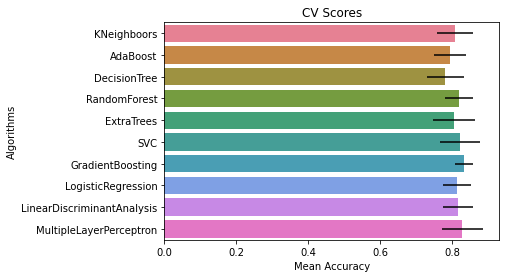

In [19]:
# Representamos estos valores del dataframe en un gráfico de barras
cv_plot = sns.barplot("CrossValMeans", "Algorithms", data = cv_frame,
                     palette="husl", orient='h', **{'xerr':cv_std})
cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

***

## 5.2.2 - Realizamos la tarea de micro-ajuste a los parámetros

***
`Random Forest`

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier

In [20]:
# Random Forest Classifier kfol=10
RF_Model= RandomForestClassifier()

RF_scores = cross_val_score(RF_Model, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

In [21]:
# Mostramos los resultados en pantalla
print(RF_scores)
round(np.mean(RF_scores)*100, 2)

[0.89473684 0.84210526 0.73684211 0.80701754 0.85964912 0.77192982
 0.77192982 0.85964912 0.8245614  0.78571429]


81.54

In [26]:
# Random Forest Classifier kfol=20
cv = 20
RF_Model= RandomForestClassifier()

RF_scores_20 = cross_val_score(RF_Model, X_train, y_train, cv = cv,
                       n_jobs = 4, scoring = 'accuracy', verbose = 2)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   17.0s finished


In [27]:
# Mostramos los resultados en pantalla
print(RF_scores_20)
round(np.mean(RF_scores_20)*100, 2)

[1.         1.         0.66666667 1.         0.66666667 0.83333333
 0.83333333 1.         0.83333333 1.         1.         0.66666667
 0.83333333 0.83333333 0.66666667 1.         0.33333333 1.
 0.5        0.5        0.83333333 1.         0.83333333 1.
 0.83333333 0.66666667 0.83333333 0.66666667 0.83333333 0.66666667
 1.         0.83333333 0.66666667 0.83333333 0.83333333 1.
 0.83333333 0.66666667 0.5        0.83333333 0.66666667 1.
 1.         1.         0.5        0.66666667 0.5        1.
 0.83333333 0.83333333 1.         0.83333333 1.         0.83333333
 0.66666667 0.83333333 1.         0.66666667 0.83333333 0.83333333
 0.66666667 0.83333333 0.83333333 0.83333333 0.5        0.66666667
 0.83333333 0.83333333 0.66666667 0.6        1.         0.6
 0.8        1.         1.         0.8        1.         0.8
 0.6        0.8        0.8        0.8        0.6        0.8
 0.8        1.         0.8        1.         1.         0.8
 1.         0.8        0.8        0.8        1.         0.6
 0.

81.1

In [28]:
# Realizamos el tuneado de los parámetros del estimador RF
RF = RandomForestClassifier()

# Creamos una tarea de tuneado basado en grid
rf_param_grid = {
    # Creamos un grid con los parámetros a iterar, para ello necesitaremos realizar iteración de n valores por parámetros
              "n_estimators": [100, 200, 300, 400],
            "criterion": ["gini", "entropy"],
            "max_depth" : [None], # por defecto hasta la máxima profundidad necesaria para quitar las impurezas
            "min_samples_split" : [2, 6, 20],
           "min_samples_leaf" : [1, 4, 16, 32],
            "max_features": ["auto", "log2"] ,
            "max_leaf_nodes" : [None] , # por defecto indica que es ilimitado
             "random_state" : [17],
            "verbose" : [2]
}


# Construimos nuestro modelo con estos parámetros con K-fold = 10
gsRF = GridSearchCV(RF, param_grid=rf_param_grid, cv=10,
                    scoring='accuracy', n_jobs=4, verbose=2)

# Aplicamos el ajuste
gsRF.fit(X_train, y_train)

# Extraemos el mejor estimador
RF_best = gsRF.best_estimator_

# Extraemos el mejor resultado
gsRF.best_score_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished


0.8417919799498745

In [29]:
# Observamos los mejores parámetro para este modelo
RF_best.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 2,
 'warm_start': False}

In [31]:
gsRF.cv_results_

{'mean_fit_time': array([0.7371634 , 1.76088784, 3.03276408, 3.23405762, 0.75001295,
        1.51317859, 2.26997361, 3.07647955, 0.59678071, 1.14963062,
        1.7480958 , 3.19420941, 0.62517765, 1.12527337, 1.72069936,
        2.28445539, 0.57560203, 1.14821417, 1.67869358, 3.05127742,
        1.06284916, 1.17959213, 1.80816185, 2.1716572 , 0.53886456,
        2.24048367, 2.63123422, 3.55905769, 0.5922395 , 1.08676937,
        2.00352194, 2.75186892, 0.55620711, 1.1239219 , 2.52814209,
        2.86273551, 1.09792912, 2.36460881, 2.0516964 , 2.26883373,
        0.67159221, 1.10918939, 1.64297736, 2.83328977, 0.70575902,
        2.24784706, 2.42026696, 2.57195108, 0.61581311, 1.34243617,
        2.06428616, 3.1418092 , 1.12764871, 2.83757753, 2.71261499,
        4.01423998, 0.99921968, 1.99780416, 2.60436747, 3.5447186 ,
        0.76549294, 1.55387814, 2.83934624, 2.58785512, 0.69527912,
        1.74915953, 2.17399077, 3.14954295, 0.65375912, 1.16097648,
        1.87964447, 2.54144917,

## Aplicamos el resultado final del modelo obtenido y lo aplicamos primero al Validation y luego al Testing dataset

In [ ]:
# Aplicamos el modelo al validación
data_val = gsLDA.predict(<dataset de validación>)

In [56]:
X_val.shape # 143

(143, 35)

In [ ]:
df_test.shape #418

In [32]:
# Sucesivamente hay que aplicarlo al testing dataset
prediction = gsRF.predict(df_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


In [33]:
# Los resultados de nuestro modelo aplicado al dataset de test 
submission = pd.DataFrame({
  'PassengerId' : ids,
    'Survived' : prediction
})

In [34]:
submission.to_csv('titanic_model.gsRF.csv', index=False)

In [35]:
submission.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [36]:
# Submission to Kaggle
!kaggle competitions submit titanic -f 'titanic_model.gsRF.csv' -m "Modelo ML utilizado tuning RF"

100%|██████████████████████████████████████| 2.77k/2.77k [00:02<00:00, 1.41kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [37]:
!kaggle competitions submissions titanic

fileName                         date                 description                                                                                                                 status    publicScore  privateScore  
-------------------------------  -------------------  --------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
titanic_model.gsRF.csv           2021-03-13 12:44:42  Modelo ML utilizado tuning LR                                                                                               complete  0.74880      None          
titanic_model.gsLR.csv           2021-03-13 11:30:48  Modelo ML utilizado tuning LR                                                                                               complete  0.77272      None          
titanic_model.gsLDA.csv          2021-03-13 09:36:24  Modelo ML utilizado tuning LDA                                                    

In [67]:
!kaggle competitions leaderboard titanic -s

 teamId  teamName                   submissionDate       score    
-------  -------------------------  -------------------  -------  
6015697  Jizhou Wei                 2020-12-16 03:13:08  1.00000  
6023788  JaesikYang                 2020-12-17 00:11:13  1.00000  
4364147  Börkapanda                 2021-02-12 19:23:04  1.00000  
6027704  Eleven_Wang                2020-12-17 04:07:35  1.00000  
6030190  Ease Gao                   2020-12-17 13:16:29  1.00000  
5322915  Marcel Reis                2020-12-17 15:57:42  1.00000  
5919487  Test 1                     2020-12-17 17:09:30  1.00000  
5705094  Zeeshan Patel              2021-02-15 04:04:10  1.00000  
5795033  Swapnils007                2020-12-18 04:59:08  1.00000  
6036587  Rustin Shamloo             2020-12-18 15:54:41  1.00000  
3749547  Adeyinka Michael Sotunde   2020-12-19 20:11:29  1.00000  
5956259  RairiU                     2020-12-19 21:58:35  1.00000  
6039146  shivanjay wagh             2020-12-22 11:46:47  1.000

***

## Ajuste de parámetros de otros estimadores